In [ ]:
## A Notebook to detect the planet transit using two different methods (BLS and TLS) fot TASTE data.

In [20]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.timeseries import BoxLeastSquares


In [21]:
data = np.genfromtxt('Data_Files/XO_TASTE_aperture2.dat')
time = data[:,0]
flux = data[:,1]
flux_err = data[:,2]

Period with max Power: P= 0.2000 days, Tc = 5892.5267. 
Depth and duration: 0.0119 %, T14 = 0.1000. 
Alternative Epoch: 5892.526706656
{'transit_times': array([5892.52670666]), 'per_transit_count': array([1487]), 'per_transit_log_likelihood': array([119761.88322818]), 'depth': (0.011873356743968166, 3.528431617798143e-05), 'depth_phased': (0.0, inf), 'depth_half': (0.0, inf), 'depth_odd': (0.0, inf), 'depth_even': (0.011873356743968166, 3.528431617798143e-05), 'harmonic_amplitude': 0.00844256298039398, 'harmonic_delta_log_likelihood': 477.18013156227244}


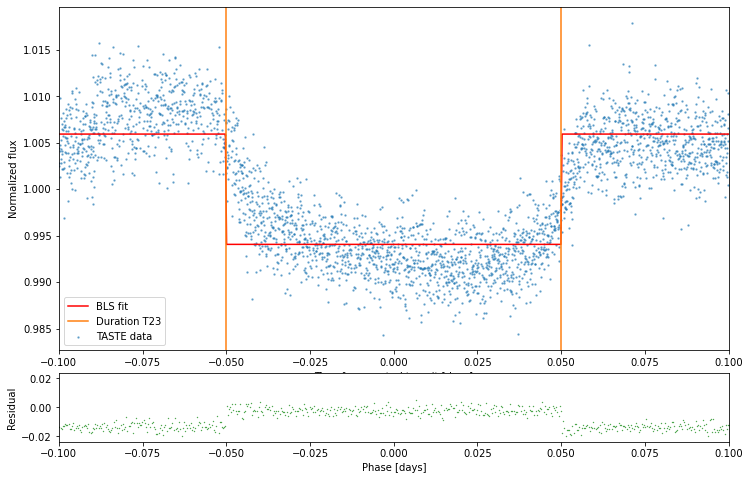

In [22]:

# BLS
model_bls = BoxLeastSquares(time, flux, dy=flux_err)
periodogram = model_bls.autopower(0.1, minimum_period=0.2, maximum_period=8, minimum_n_transit=3,  objective="snr")
known_period = 2.61585922 # Gaudi+2017

%matplotlib widget 
%matplotlib inline

max_power = np.argmax(periodogram.power)
period_bls = periodogram.period[max_power]
epoch_bls = periodogram.transit_time[max_power]
depth_bls = (periodogram.depth[max_power])
duration_bls = periodogram.duration[max_power]

print('Period with max Power: P= {:.4f} days, Tc = {:.4f}. '
      .format(period_bls, epoch_bls))
print('Depth and duration: {:.4f} %, T14 = {:.4f}. '
      .format(depth_bls, duration_bls))

# Compute stats:
stats = model_bls.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])

print('Alternative Epoch: {}'.format(stats['transit_times'][-1]))
epoch_bls = stats['transit_times'][0]

# phase fold plot:
phase = (time - epoch_bls) % period_bls / period_bls
phase[np.where(phase>0.5)] -= 1 

print(stats)

index = np.argmax(periodogram.power)
t0 = periodogram.transit_time[index]
period = periodogram.period[index]
duration = periodogram.duration[index]

line = np.linspace(-0.5, 0.5, len(flux))
fit = model_bls.model(line + t0, period, duration, t0)

residual = flux - fit 

offset = 0

## plot the phase fold
fig = plt.figure(figsize=(12,8))
grid = plt.GridSpec(10,10, hspace=1, wspace=0.0)
x = fig.add_subplot(grid[0:8, 0:])
x.scatter(phase*period_bls, flux+offset, c='C0', s=2, alpha=0.5, label='TASTE data')
x.plot(line, fit+offset, color='red', label="BLS fit")
x.axvline(-duration_bls/2, c='C1', label='Duration T23')
x.axvline(duration_bls/2, c='C1')
x.set_xlim(-0.1, 0.1)
#x.set_ylim(0.990, 1.005)
x.set_xlabel("Time from central transit [days]")
x.set_ylabel("Normalized flux")
x.legend()


y = fig.add_subplot(grid[8:, 0:])
y.scatter(line, residual, c='green', s=0.1)
#y.set_ylim(-0.05, 0.05)
y.set_xlim(-0.1,0.1)
y.set_ylabel('Residual')
y.set_xlabel("Phase [days]")
plt.savefig('Transit-TASTE-BLS2.pdf')

In [23]:
# TLS 
from transitleastsquares import transitleastsquares
model_tls = transitleastsquares(time, flux)
results = model_tls.power()

print('Period', format(results.period, '.5f'), 'd')
print(len(results.transit_times), 'transit times in time series:', \
        ['{0:0.5f}'.format(i) for i in results.transit_times])
print('Normalized flux at the center of transit', format(results.depth, '.5f'))
print('Best duration (days)', format(results.duration, '.5f'))
print('Signal detection efficiency (SDE):', results.SDE)

print("-----------------------------")
print('Period', format(results.period, '.5f'), 'd at T0=', results.T0)
print(len(results.transit_times), 'transit times in time series:', ['{0:0.5f}'.format(i) for i in results.transit_times])
print('Number of data points during each unique transit', results.per_transit_count)
print('The number of transits with intransit data points', results.distinct_transit_count)
print('The number of transits with no intransit data points', results.empty_transit_count)
print('Transit depth', format(results.depth, '.5f'), '(at the transit bottom)')
print('Transit duration (days)', format(results.duration, '.5f'))
print('Transit depths (mean)', results.transit_depths)
print('Transit depth uncertainties', results.transit_depths_uncertainties)

plt.figure()
plt.errorbar(
    results.transit_times,
    results.transit_depths,
    yerr=results.transit_depths_uncertainties,
    fmt='o', color='red')
plt.plot(
    (time.min(), time.max()),
    (np.mean(results.transit_depths), np.mean(results.transit_depths)),
     color='black', linestyle='dashed')
plt.plot((time.min(), time.max()), (1, 1), color='black')
plt.xlabel('Time (days)')
plt.ylabel('Flux');

Transit Least Squares TLS 1.0.25 (04 June 2020)


C:\Users\Mohamed Emam\anaconda3\lib\site-packages\transitleastsquares-1.0.25-py3.8.egg\transitleastsquares\grid.py:149: UserWarning: period_grid defaults to R_star=1 and M_star=1 as given density yielded grid with too few values
  warnings.warn(
C:\Users\Mohamed Emam\anaconda3\lib\site-packages\transitleastsquares-1.0.25-py3.8.egg\transitleastsquares\transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lc_arr = numpy.array(lc_arr)
  0%|                                                                                         | 0/268 periods | 00:00<?

Creating model cache for 26 durations
Searching 2905 data points, 268 periods from 0.6 to 2.5 days
Using all 8 CPU threads


100%|███████████████████████████████████████████████████████████████████████████████████| 268/268 periods | 00:13<00:00
C:\Users\Mohamed Emam\anaconda3\lib\site-packages\transitleastsquares-1.0.25-py3.8.egg\transitleastsquares\stats.py:456: RuntimeWarning: divide by zero encountered in double_scalars
  snr_pink_per_transit[i] = (1 - mean_flux) / pinknoise
c:\users\mohamed emam\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\mohamed emam\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\users\mohamed emam\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Period 1.39599 d
1 transit times in time series: ['5892.54564']
Normalized flux at the center of transit 0.99042
Best duration (days) 0.02178
Signal detection efficiency (SDE): 3.907230863568792
-----------------------------
Period 1.39599 d at T0= 5892.545637404331
1 transit times in time series: ['5892.54564']
Number of data points during each unique transit [331.]
The number of transits with intransit data points 1
The number of transits with no intransit data points 0
Transit depth 0.99042 (at the transit bottom)
Transit duration (days) 0.02178
Transit depths (mean) [0.99183463]
Transit depth uncertainties [0.00013876]


In [25]:
res = results.model_folded_model - results.folded_y

fig = plt.figure(figsize=(8, 4))
grid = plt.GridSpec(10,10, hspace=7, wspace=1.0)
y = fig.add_subplot(grid[0:8, 0:])
y.scatter((results.folded_phase-0.5)*results.period, (results.folded_y)-0.007, c='blue', s=2, alpha=0.5, label='TASTE data')
y.plot((results.model_folded_phase-0.5)*results.period, results.model_folded_model, color='red', label='Default TLS LD')


y.legend()
y.set_ylabel('Relative flux')
y.set_ylim(0.97, 1.015)
y.set_xlim(min((results.folded_phase-0.5)*results.period),max((results.folded_phase-0.5)*results.period))

x = fig.add_subplot(grid[8:, 0:])
x.scatter((results.model_folded_phase-0.5)*results.period, res, c='red', s=0.8)
yas = np.zeros(len(results.model_folded_phase))
x.plot((results.model_folded_phase-0.5)*results.period, yas, color='grey')
x.set_ylim(-0.02, 0.035)
x.set_xlim(min((results.folded_phase-0.5)*results.period),max((results.folded_phase-0.5)*results.period))
x.legend()
x.set_ylabel('Residual')
x.set_xlabel("Phase [days]")


No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


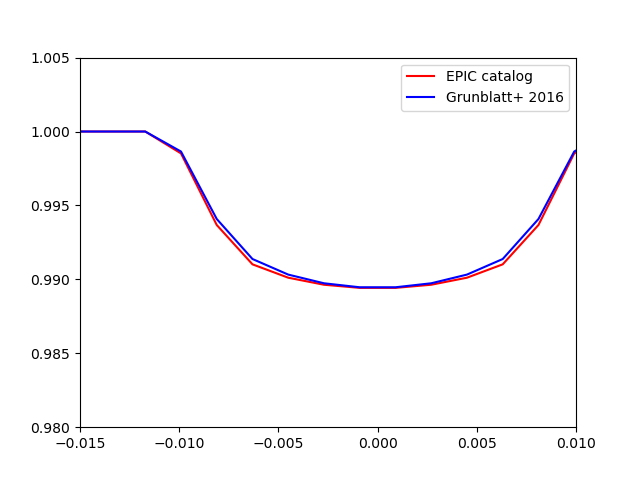

In [6]:
import batman

def transit(ld):  # Use batman to create transits
    ma = batman.TransitParams()
    ma.t0 = 0  # time of inferior conjunction; first transit is X days after start
    ma.per = 1.6143  # orbital period
    ma.rp = 69911 / 696342  # 6371 planet radius (in units of stellar radii)
    ma.a = 20  # semi-major axis (in units of stellar radii)
    ma.inc = 88  # orbital inclination (in degrees)
    ma.ecc = 0  # eccentricity
    ma.w = 90  # longitude of periastron (in degrees)
    ma.u = ld  # limb darkening coefficients
    ma.limb_dark = "quadratic"  # limb darkening model
    m = batman.TransitModel(ma, time)  # initializes model
    return m.light_curve(ma)

ab= [0.4091, 0.2983]
time = np.linspace(-0.9, 0.9, 1000)
plt.figure()
plt.plot(time, transit(ld=ab), color='red', label='EPIC catalog')
plt.plot(time, transit(ld=[0.6505, 0.1041]), color='blue', label='Grunblatt+ 2016')
plt.xlim(-0.015,0.01)
plt.ylim(0.98,1.005)
plt.legend();